
<img src="https://www.inderdhillon.com/files/logo-gray.png" width="100">

<h1>Enterprise Return Offer Analysis</h1>
<b>Inder Dhillon</b><br>
<i>inderdhillon.com</i><br><br>
A very serious and definitely <strike>not a satire</strike> analysis on my chances of getting a return offer based on past data. <br><br>Source of Data :
One of the slides from the onboarding deck.
<hr><br>

# Prologue

Importing Libraries:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor

It's just 3 rows and 6 columns of data I could just enter it in. Or, I could go the hard route and read it from the ppt.

In [ ]:
pip install python-pptx

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
from pptx import Presentation

In [ ]:
prs = Presentation("/content/drive/My Drive/Colab Files/Return Offer/Builder Intern Onboarding Orientation Session_Master Deck 2020.pptx")

Using _domain knowledge_ to choose the slide which has the table.

In [ ]:
data_slide = prs.slides[35]

In [ ]:
for shape in data_slide.shapes:
  if shape.has_table:
    table = shape.table

I am surprised the python pptx doesn't have the following helper methods, maybe I'll contribute to the project. (Edit: I tried, guess the project is not taking contributions).

In [ ]:
def table_to_df(table, header = True):
  i = 0
  if header is True:
    table_df = pd.DataFrame(columns=to_list(table.rows[0]))
    print(type(table.rows))

  for row in table.rows:
    table_df.loc[i] = to_list(row)
    i += 1
  table_df = table_df.drop(index=[0])
  return table_df

def to_list(row):
  row_list = []
  for cell in row.cells:
      row_list.append(cell.text)
  return row_list

df = table_to_df(table)

<class 'pptx.table._RowCollection'>


Cleaning the data to my preferences:

In [ ]:
df = df.set_index([""])
df

,2015,2016,2017,2018,2019,2020
,,,,,,
Build Centers,SEA,SEA\nCHI,SEA\nCHI\nBOS,SEA\nCHI\nBOS\nTOR,SEA\nCHI\nBOS\nTOR\nDEN\nHOU,SEA\nCHI\nBOS\nTOR\nDEN\nHOU\nATL\nCLT
# of Interns,3,8,14,20,30,51
Product(s),Mobile MyTime,Profile Builder\nStaffing Analysis,Slalom Expenses Web + Mobile,Candidate Experience App\nSlalom ChatBot,Project HACK\nBuild Center Experience App\nOpe...,Open Source PEM R2\nBuild Center Experience En...
# of Applicants,302,"1,004","1,511","1,436","3,512","4,488"
# of Hires,3,7,4,12,16 Offers to date,TBD


In [ ]:
df.loc[ 'Build Centers' , :] = df.loc[ 'Build Centers' , :].str.replace("\n", ",")
df.loc[ 'Product(s)' , :] = df.loc[ 'Product(s)' , :].str.replace("\n", ",")
df.loc[ '# of Applicants' , :] = df.loc[ '# of Applicants' , :].str.replace(",", "")
df = df.transpose()

In [ ]:
df

,Build Centers,# of Interns,Product(s),# of Applicants,# of Hires
2015,SEA,3,Mobile MyTime,302,3
2016,"SEA,CHI",8,"Profile Builder,Staffing Analysis",1004,7
2017,"SEA,CHI,BOS",14,Slalom Expenses Web + Mobile,1511,4
2018,"SEA,CHI,BOS,TOR",20,"Candidate Experience App,Slalom ChatBot",1436,12
2019,"SEA,CHI,BOS,TOR,DEN,HOU",30,"Project HACK,Build Center Experience App,Open ...",3512,16 Offers to date
2020,"SEA,CHI,BOS,TOR,DEN,HOU,ATL,CLT",51,"Open Source PEM R2,Build Center Experience Enh...",4488,TBD


In [ ]:
df.loc[ '2019', '# of Hires'] = "16"
df.loc[ '2020', '# of Hires'] = "-1"
df["Year"] = df.index.values
df["Year"] = pd.to_numeric(df["Year"])
df["# of Interns"] = pd.to_numeric(df["# of Interns"])
df["# of Applicants"] = pd.to_numeric(df["# of Applicants"])
df["# of Hires"] = pd.to_numeric(df["# of Hires"])
df.reset_index(inplace=True, drop=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Build Centers    6 non-null      object
 1   # of Interns     6 non-null      int64 
 2   Product(s)       6 non-null      object
 3   # of Applicants  6 non-null      int64 
 4   # of Hires       6 non-null      int64 
 5   Year             6 non-null      int64 
dtypes: int64(4), object(2)
memory usage: 416.0+ bytes


We finally have our data which would have taken significantly less time if I just entered it:

In [ ]:
df

,Build Centers,# of Interns,Product(s),# of Applicants,# of Hires,Year
0,SEA,3,Mobile MyTime,302,3,2015
1,"SEA,CHI",8,"Profile Builder,Staffing Analysis",1004,7,2016
2,"SEA,CHI,BOS",14,Slalom Expenses Web + Mobile,1511,4,2017
3,"SEA,CHI,BOS,TOR",20,"Candidate Experience App,Slalom ChatBot",1436,12,2018
4,"SEA,CHI,BOS,TOR,DEN,HOU",30,"Project HACK,Build Center Experience App,Open ...",3512,16,2019
5,"SEA,CHI,BOS,TOR,DEN,HOU,ATL,CLT",51,"Open Source PEM R2,Build Center Experience Enh...",4488,-1,2020


Plotting a regression graph to try visualize if there seems to be a strong correlation:



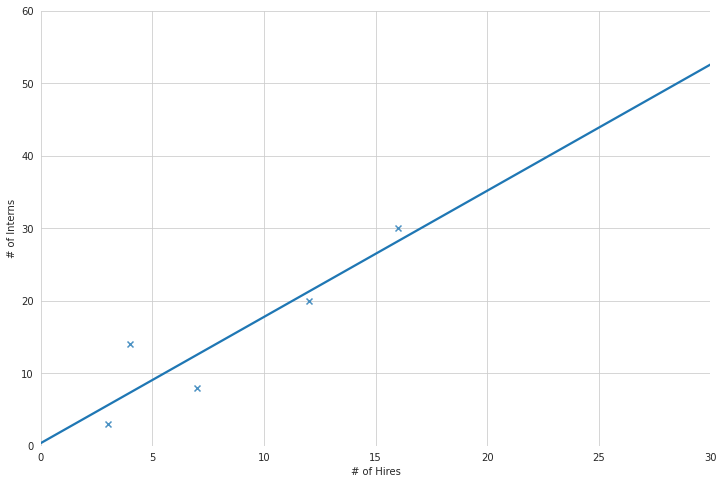

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
plt.xlim(0,30)
plt.ylim(0,60)
sns.regplot(x="# of Hires", y="# of Interns", data=df.drop(5), marker='x', truncate=False, ci=0)
sns.despine(left=True, bottom=True)

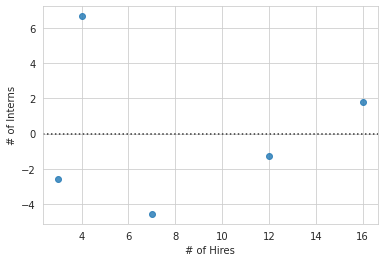

In [ ]:
sns.residplot(x="# of Hires", y="# of Interns", data=df.drop(5))

Seems like there's enough to work with here. Also I won't be doing a train/test split or cross validation (*sacrilege*) because of the size of the dataset, we are just swinging for the fences here:

In [ ]:
df_past_data = df.drop(5)

In [ ]:
df_past_data

,Build Centers,# of Interns,Product(s),# of Applicants,# of Hires,Year
0,SEA,3,Mobile MyTime,302,3,2015
1,"SEA,CHI",8,"Profile Builder,Staffing Analysis",1004,7,2016
2,"SEA,CHI,BOS",14,Slalom Expenses Web + Mobile,1511,4,2017
3,"SEA,CHI,BOS,TOR",20,"Candidate Experience App,Slalom ChatBot",1436,12,2018
4,"SEA,CHI,BOS,TOR,DEN,HOU",30,"Project HACK,Build Center Experience App,Open ...",3512,16,2019


In [ ]:
X = df_past_data[["# of Interns"]]
y = df_past_data[["# of Hires"]]

# 1. Linear Regression

In [ ]:
lm = LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
yhat = lm.predict([[51]])

In [ ]:
print("R-squared score: " , lm.score(X, y))

R-squared score:  0.8273310439152023


Wow a great R^2 score on training data, I should be confident in my prediction now (*LOL*)

In [ ]:
df.iloc[5,4] = round(yhat[0][0], 0)
print("Predicted number of hires for 2020: ", df.iloc[5,4])

Predicted number of hires for 2020:  26.0


So, based on past data 26 interns should get hired in the 2020 internship term across all locations.
<br><br>
![alt text](https://everanalytics.files.wordpress.com/2015/07/01_dilbertcartoon1.gif?w=748)

In [ ]:
print("Probability of an intern to get hired full-time: ", df.loc[5,"# of Hires"]/df.loc[5,"# of Interns"])

Probability of an intern to get hired full-time:  0.5098039215686274


I know what you're thinking (DAs can read your mind), getting a return offer is a yes/no question so if we had no data at all, the probability of getting a return offer would be 0.50 as there are only two choices. Hence, this analysis is useless. And I would agree, except the probability is not 0.50 it's **0.51**. So, clearly my labour has generated some insightful, well *insights*.

In [ ]:
df

,Build Centers,# of Interns,Product(s),# of Applicants,# of Hires,Year
0,SEA,3,Mobile MyTime,302,3.0,2015
1,"SEA,CHI",8,"Profile Builder,Staffing Analysis",1004,7.0,2016
2,"SEA,CHI,BOS",14,Slalom Expenses Web + Mobile,1511,4.0,2017
3,"SEA,CHI,BOS,TOR",20,"Candidate Experience App,Slalom ChatBot",1436,12.0,2018
4,"SEA,CHI,BOS,TOR,DEN,HOU",30,"Project HACK,Build Center Experience App,Open ...",3512,16.0,2019
5,"SEA,CHI,BOS,TOR,DEN,HOU,ATL,CLT",51,"Open Source PEM R2,Build Center Experience Enh...",4488,26.0,2020


# 2. Lasso Regression

Lasso usually helps for multivariable linear relationship. This is not a multivariable linear relationship. I'm just hoping it does something different.

In [ ]:
lasso = Lasso()

In [ ]:
lasso.fit(X,y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
print("R-squared score: " , lasso.score(X, y))

R-squared score:  0.826866470430827


In [ ]:
yhatLasso = lasso.predict([[51]])

In [ ]:
print("Predicted number of hires for 2020: ", round(yhatLasso[0], 0))

Predicted number of hires for 2020:  25.0


In [ ]:
print("Probability of an intern to get hired full-time: ", round(yhatLasso[0], 0)/df.loc[5,"# of Interns"])

Probability of an intern to get hired full-time:  0.49019607843137253


For some reason I like the other model which gave a 2% higher probability.
Head over to the epilogue to see me use the years (which I know is a categorical variable) as a quantitative variable in another linear regression.

# Epilogue:

Let's predict how many applications the recruiters will be going through in 2021 (Don't tell them it'll only make them sad):

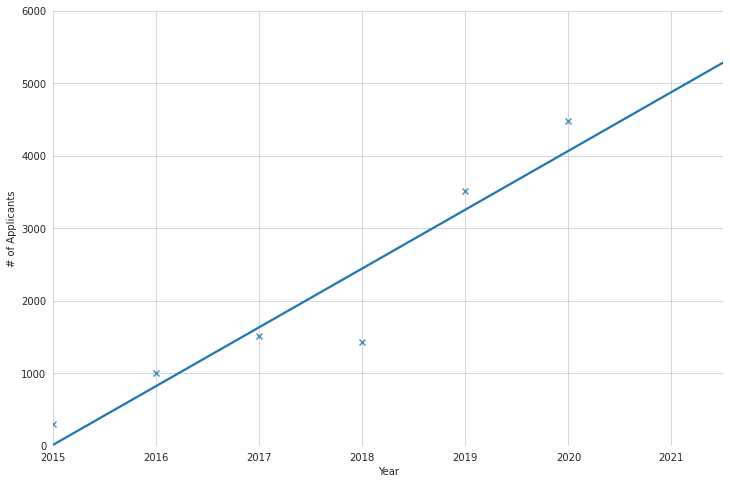

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
plt.xlim(2015,2021.5)
plt.ylim(0, 6000)
sns.regplot(x="Year", y="# of Applicants", data=df, marker='x', truncate=False, ci=0)
sns.despine(left=True, bottom=True)

In [ ]:
lm2 = LinearRegression()
lm2.fit(df[["Year"]], df[["# of Applicants"]])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
yhat2 = lm2.predict([[2021]])
print("Predicted Number of Applicants for 2021: ", round(yhat2[0][0], 0))

Predicted Number of Applicants for 2021:  4880.0


# The End